In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import scipy.stats as ss

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
h = 1
sd = 1
n = 50

In [7]:
def gen_data(n,h,sd1,sd2):
    """Generates sample data from a normal distribution.
    inputs are- the mean, standard dev for class 1, standard dev for class 2  and number of samples to generate."""
    x1 = ss.norm.rvs(-h, sd1, n) # x1 is on the other side(-ve) of the origin
    y1 = ss.norm.rvs(0, sd1, n)

    x2 = ss.norm.rvs(h, sd2, n) #x2 is on the posititve side of the origin
    y2 = ss.norm.rvs(0, sd2, n)
    return (x1,y1,x2,y2)

In [8]:
(x1,y1,x2,y2)= gen_data(50,1,1,1.5)

In [33]:
(x1,y1,x2,y2)= gen_data(1000,1,1,1.5)

In [10]:
def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1,y1,"o",ms = 2)
    plt.plot(x2,y2,"v",ms = 2)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    

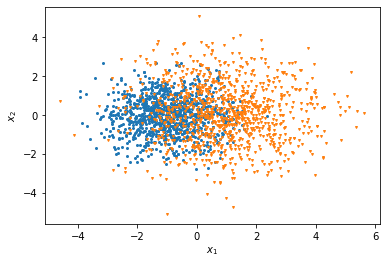

In [11]:
%matplotlib inline
plot_data(x1, y1, x2, y2)

The area of the orange cloud is broader because we used a higher value of standard deviation for the 2nd set of samples.

In [12]:
x1,y1,x2,y2 = gen_data(50, 20, 0.5, 0.5)

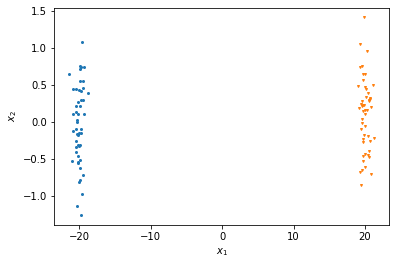

In [13]:
plot_data(x1,y1,x2,y2)

$\therefore$ higher the mean , easier to classify the samples directly.

## Logistic regression-

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
clf = LogisticRegression()

In [16]:
a = np.array(([1,2,3],[4,5,6]))

In [17]:
b =np.array(([1,1,3],[4,2,6]))

In [18]:
np.hstack((a,b)).shape

(2, 6)

In [32]:
x1.shape

(50,)

In [20]:
y1.shape

(50,)

In [34]:
X = np.vstack((np.vstack((x1,y1)).T,np.vstack((x1,y1)).T))

In [35]:
X.shape

(2000, 2)

In [23]:
n = 1000

Making the outcome Y vector-

In [36]:
y = np.hstack((np.repeat(1,n),np.repeat(2,n)))

In [37]:
y.shape

(2000,)

In [26]:
for char in y:
    
    print(np.argwhere(y==2)[0])
    break

[1000]


In [38]:
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size = 0.5,random_state = 1)

In [39]:
X_train.shape

(1000, 2)

In [40]:
y_test.shape

(1000,)

In [41]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
clf.score(X_test,y_test)

0.47

In [43]:
clf.predict_proba(np.array([-56,-1]).reshape(1,-1)) # if x = -15 and y = 45
# these are x and y values, i.e. the predictor values

array([[0.8415934, 0.1584066]])

In [45]:
clf.predict(np.array([-56,-1]).reshape(1,-1)) # precidts the class based on the model trained


array([1])

In [44]:
np.vstack((np.ravel(x1),np.ravel(y1))).T.shape

(1000, 2)

## Computing probabilities acorss a meshgrid-

In [46]:
def plot_probs(ax,clf,class_no):
    xx1,xx2 = np.meshgrid(np.arange(-5,5,0.1), np.arange(-5,5,0.1))
    probs  = clf.predict_proba(np.vstack((np.ravel(xx1),np.ravel(xx2))).T)
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    cs = ax.contourf(xx1,xx2,Z)
    cbar = plt.colorbar(cs)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    

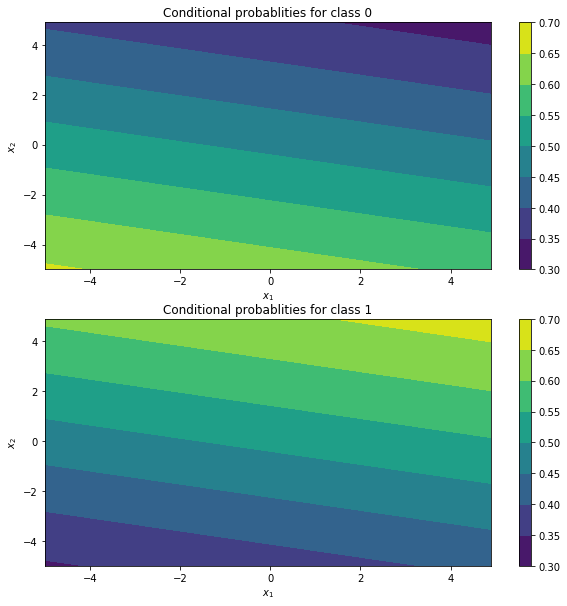

In [48]:
plt.figure(figsize = (10,10))
ax = plt.subplot(211)
plot_probs(ax,clf,0)
plt.title("Conditional probablities for class 0")

ax = plt.subplot(212)
plot_probs(ax,clf,1)
plt.title("Conditional probablities for class 1")
plt.savefig("Computing_prob.png")